# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Goal is to analyse movie data based off the 538 article ([Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**) **and see if concnclusions are similar. I am going to use pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---

## Part One: Understanding the Background and Data



----
### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

**Checkpoint 1.** Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fandango = pd.read_csv("fandango_scrape.csv")

In [6]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [7]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [62]:
fandango.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


**Checkpoint 2.** Exploring the relationship between popularity of a film and its rating.

<Axes: xlabel='RATING', ylabel='VOTES'>

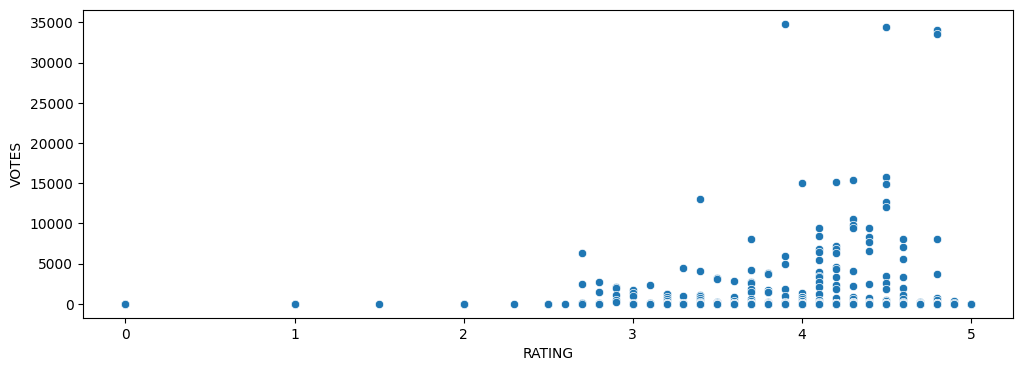

In [9]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=fandango, x="RATING", y="VOTES")

In [63]:
fandango[["STARS","RATING","VOTES"]].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Checkpoint 3.** Frequency analysis.

In [11]:
# Separating the column that contains the name and film year into a column with the year of the film
fandango['Year'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [12]:
# Checking the frequency of the "Year" column
fandango["Year"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

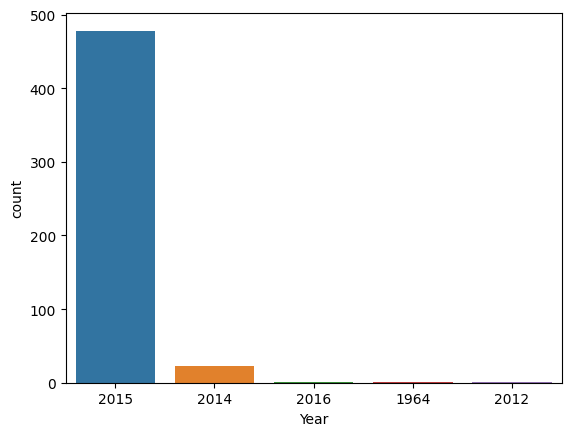

In [13]:
# Ploting the "Year" column
sns.countplot(data=fandango,x="Year")

In [14]:
# 10 movies with highest number of votes
fandango.sort_values(by=["VOTES"], ascending=False)[:10]

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [15]:
# Number of movies with zero votes
fandango[fandango["VOTES"] == 0].count()["VOTES"]

69

In [16]:
# Updating DataFrame of only reviewed films
fandango = fandango[fandango["VOTES"] != 0]
len(fandango)

435

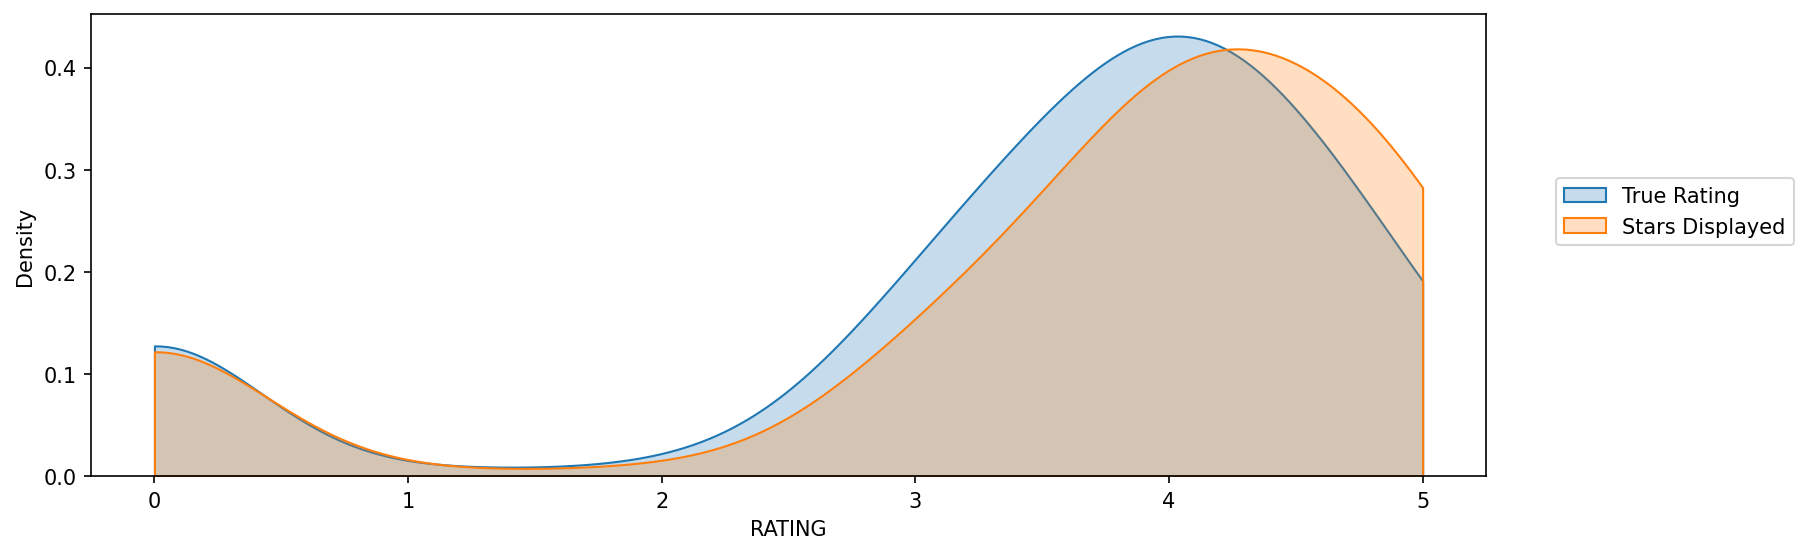

In [64]:
# The distributions of ratings that are dispayed (STARS) versus what the true rating was from votes (RATING)
plt.figure(figsize=(12,4), dpi=150)
sns.kdeplot(data=fandango, x="RATING", clip=(0,5), label="True Rating", fill=True)
sns.kdeplot(data=fandango, x="STARS", clip=(0,5), label="Stars Displayed", fill=True)
plt.legend(loc=(1.05,0.5))

In [18]:
# Quantifing the discepancy between STARS and RATING
fandango["STARS_DIFF"] = fandango["STARS"] - fandango["RATING"]
fandango.head()

,FILM,STARS,RATING,VOTES,Year,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='Count'>

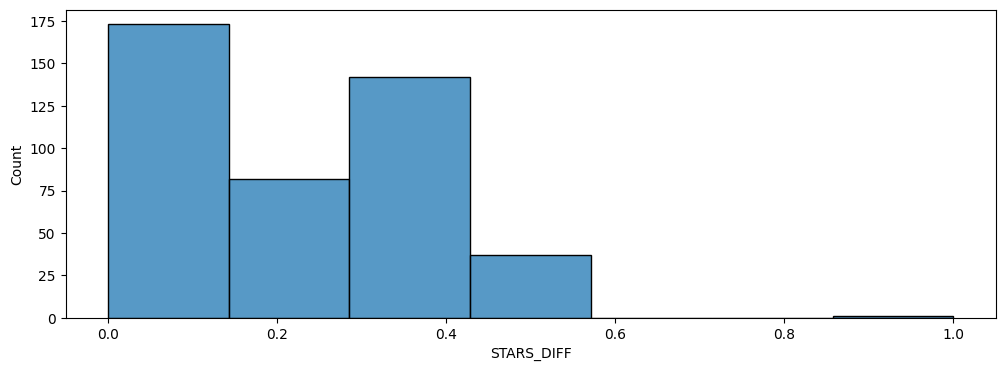

In [24]:
# Displaying the number of times a certain difference occurs
plt.figure(figsize=(12,4))
sns.histplot(data=fandango, x="STARS_DIFF", bins=7)

In [25]:
# Movie that is close to 1 star differential
fandango[fandango["STARS_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,Year,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [5]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [27]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [28]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

(0.0, 100.0)

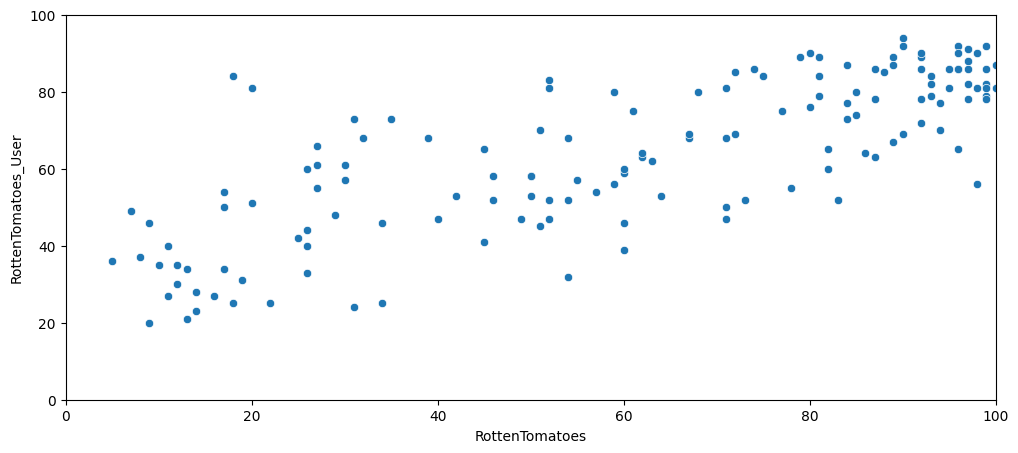

In [30]:
#  a scatterplot exploring the relationship between RT Critic reviews and RT User reviews
plt.figure(figsize=(12,5))
sns.scatterplot(data=all_sites, x="RottenTomatoes", y="RottenTomatoes_User")
plt.xlim(0,100)
plt.ylim(0,100)

In [31]:
# Difference between critics rating and users rating for Rotten Tomatoes
all_sites["Rotten_Diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [33]:
# absolute mean difference between the critics rating versus the user rating
all_sites["Rotten_Diff"].abs().mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

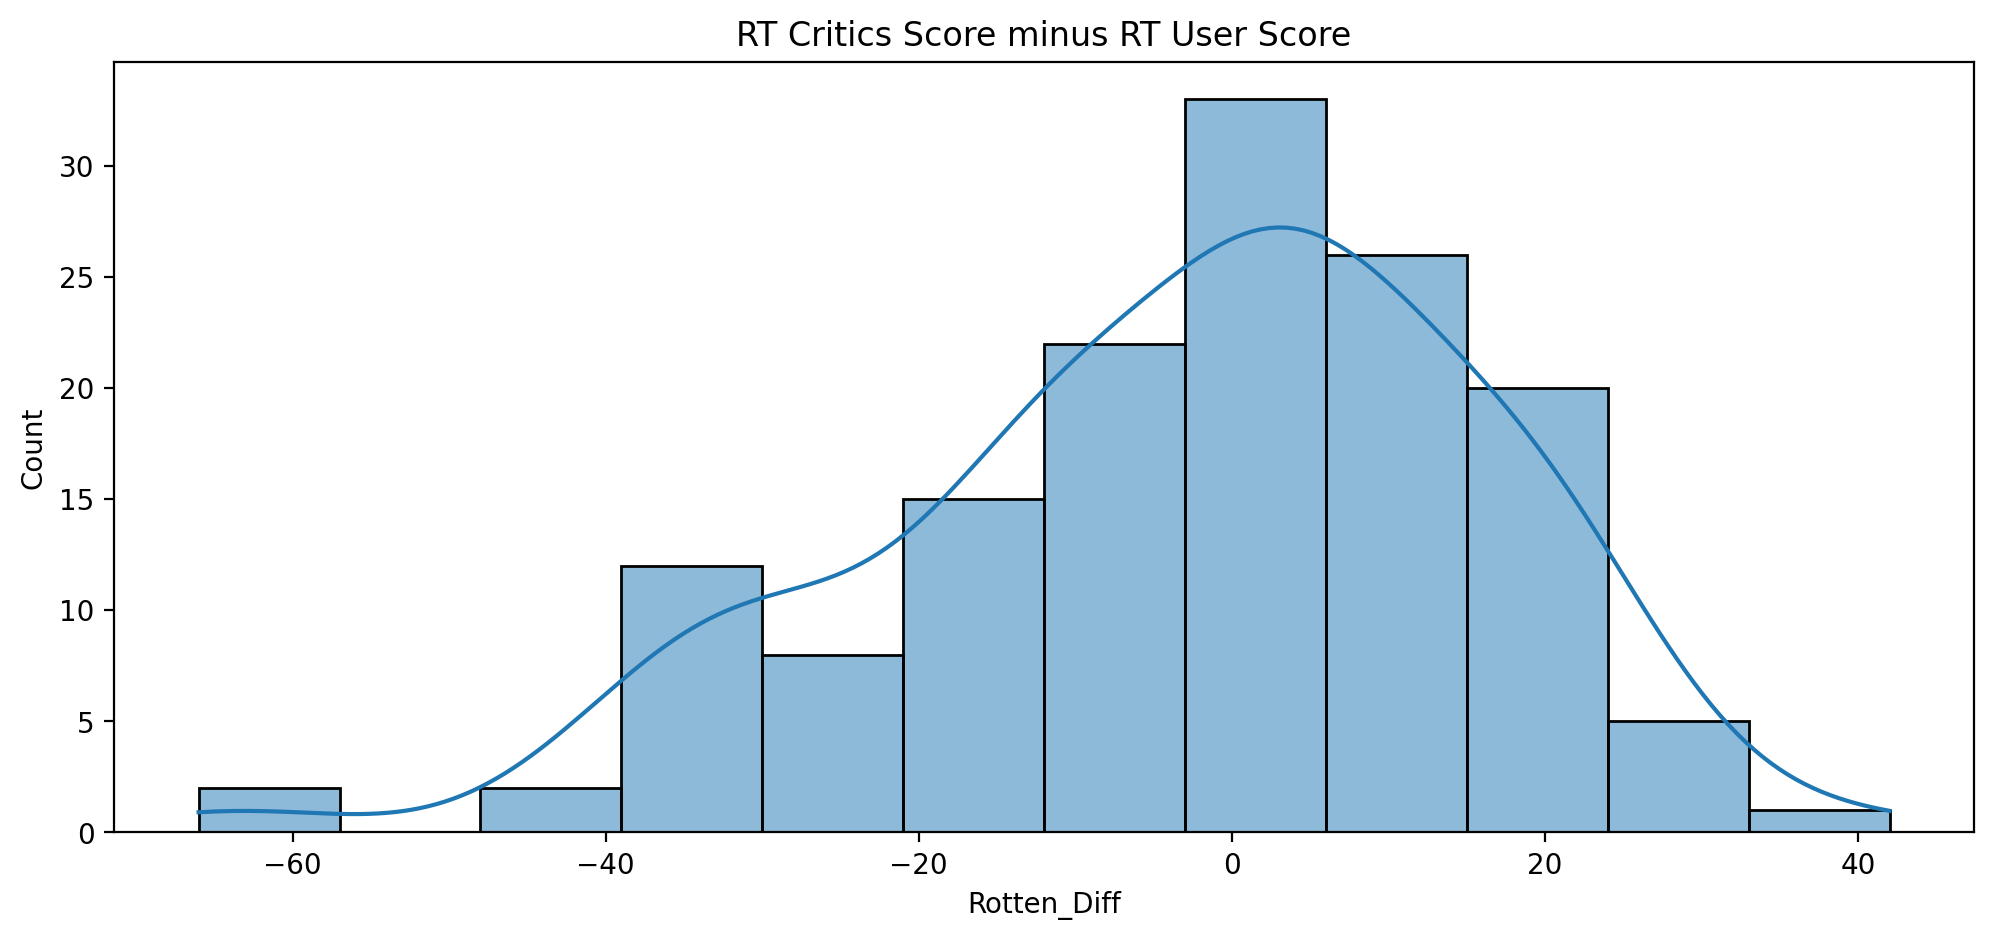

In [34]:
# The distribution of the differences between RT Critics Score and RT User Score
plt.figure(figsize=(12,5),dpi=200)
sns.histplot(x=all_sites["Rotten_Diff"], kde=True)
plt.title("RT Critics Score minus RT User Score")

Text(0.5, 1.0, 'Absolute Difference between RT Critics Score and RT User Score')

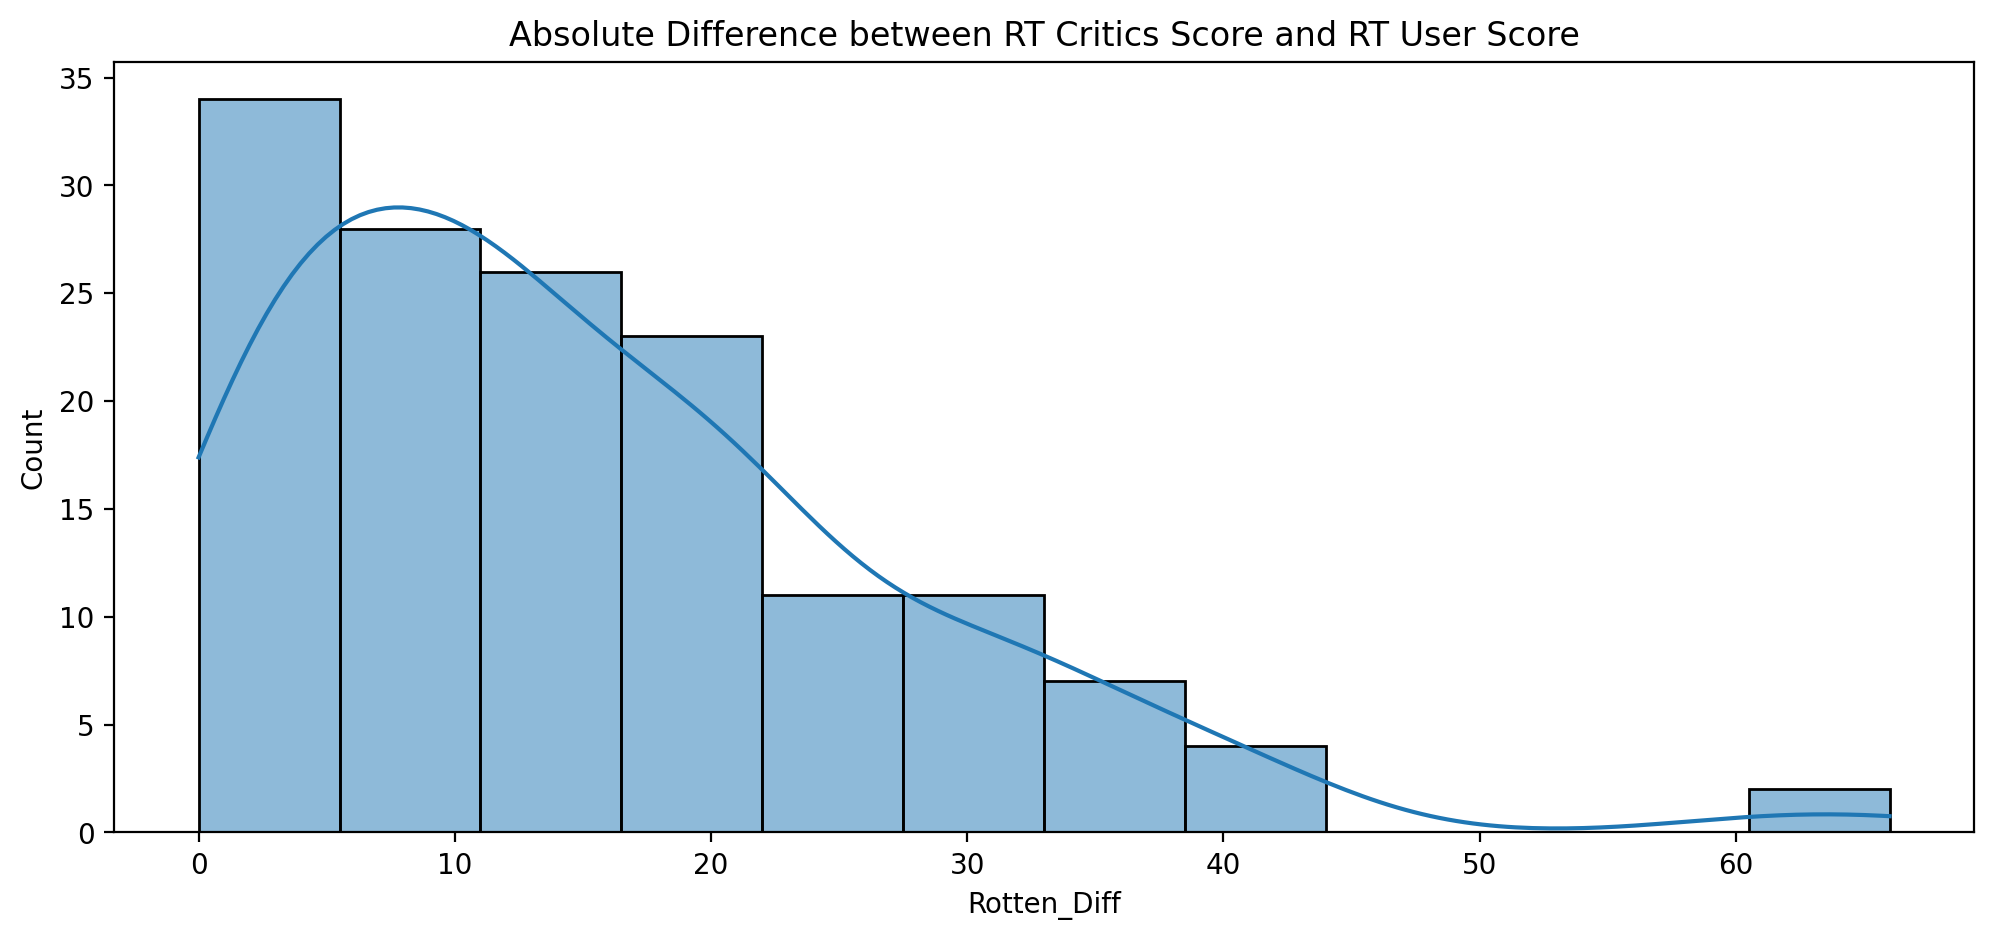

In [35]:
# a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes
plt.figure(figsize=(12,5),dpi=200)
sns.histplot(x=all_sites["Rotten_Diff"].abs(), kde=True)
plt.title("Absolute Difference between RT Critics Score and RT User Score")

In [36]:
# Top 5 movies users rated higher than critics on average
# Users Love but Critics Hate
all_sites.sort_values(by=["Rotten_Diff"])[:5][["FILM", "Rotten_Diff"]]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [37]:
# The top 5 movies critics scores higher than users on average
# Critics love, but Users Hate
all_sites.sort_values(by=["Rotten_Diff"], ascending=False)[:5][["FILM", "Rotten_Diff"]]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

(0.0, 10.0)

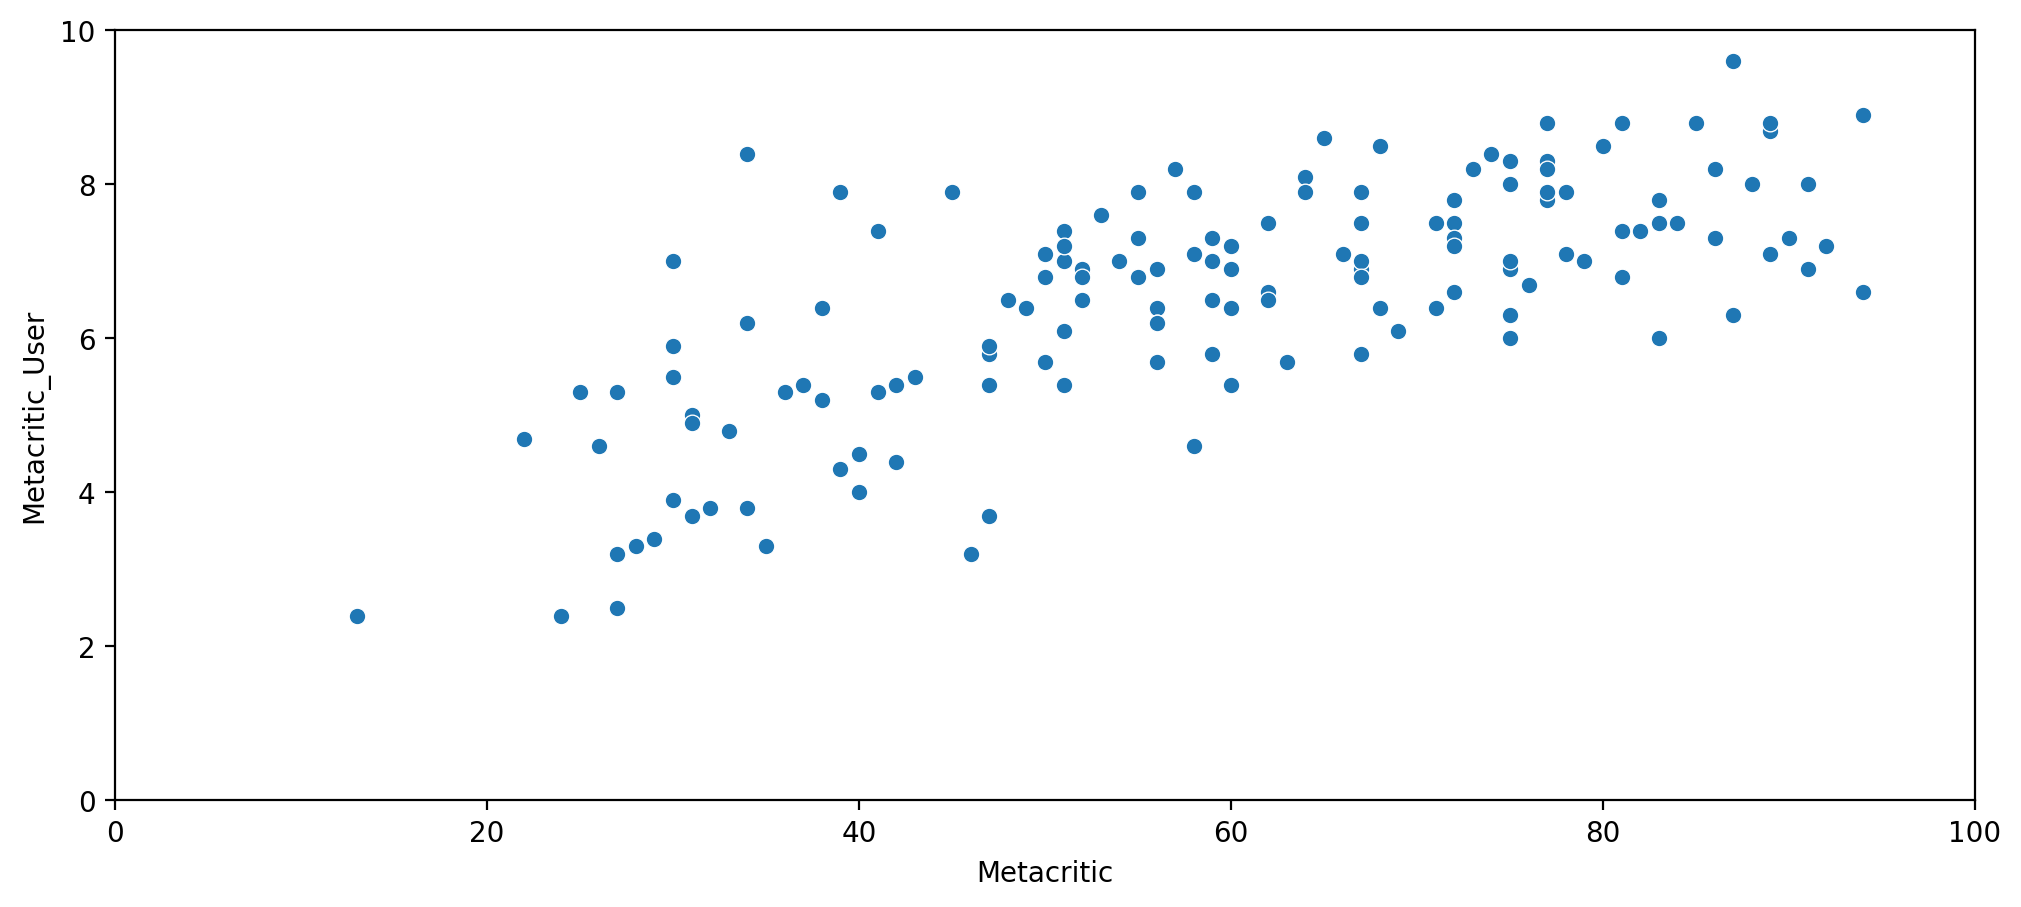

In [38]:
# Metacritic Rating versus the Metacritic User rating
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=all_sites, x="Metacritic",y="Metacritic_User")
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

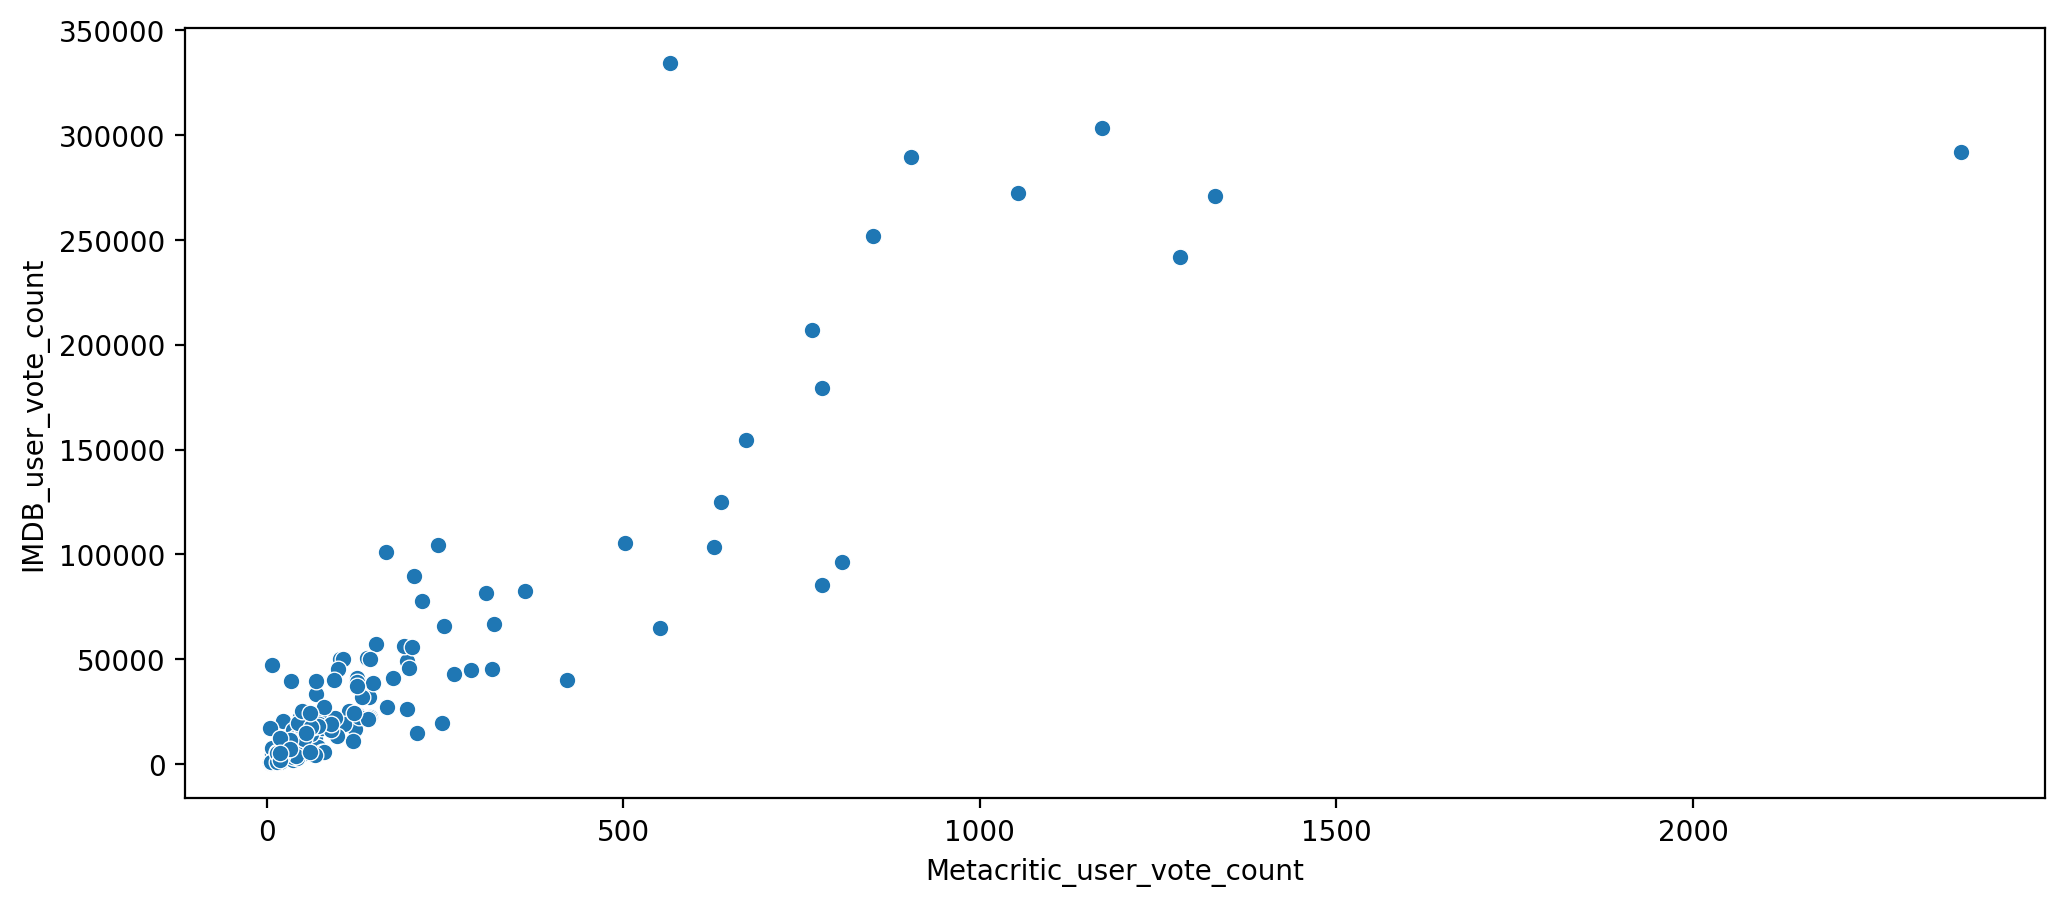

In [39]:
# The relationship between vote counts on MetaCritic versus vote counts on IMDB
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=all_sites, x="Metacritic_user_vote_count",y="IMDB_user_vote_count")

In [40]:
# Movie that has the highest IMDB user vote count
all_sites[all_sites["IMDB_user_vote_count"] == all_sites["IMDB_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [41]:
# Movie has the highest Metacritic User Vote count
all_sites[all_sites["Metacritic_user_vote_count"] == all_sites["Metacritic_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [45]:
# Inner join to merge together both DataFrames based on the FILM column
df = pd.merge(fandango, all_sites, on="FILM", how="inner")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 13.6+ KB


In [47]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252


### Normalizing columns to Fandango STARS and RATINGS 0-5 

Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [48]:
# Normalizing by the current scale level
df["RT_norm"] = df["RottenTomatoes"] / 20
df["RTUser_norm"] = df["RottenTomatoes_User"] / 20
df["Meta_norm"] = df["Metacritic"] / 20
df["MetaUser_norm"] = df["Metacritic_User"] / 2
df["Imdb_norm"] = df["IMDB"] / 2
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_norm,RTUser_norm,Meta_norm,MetaUser_norm,Imdb_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,4.90,4.50,4.70,4.45,4.30


In [49]:
df = df[["FILM", "STARS","RATING","RT_norm","RTUser_norm","Meta_norm","MetaUser_norm","Imdb_norm"]]
df.head()

,FILM,STARS,RATING,RT_norm,RTUser_norm,Meta_norm,MetaUser_norm,Imdb_norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

In [50]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

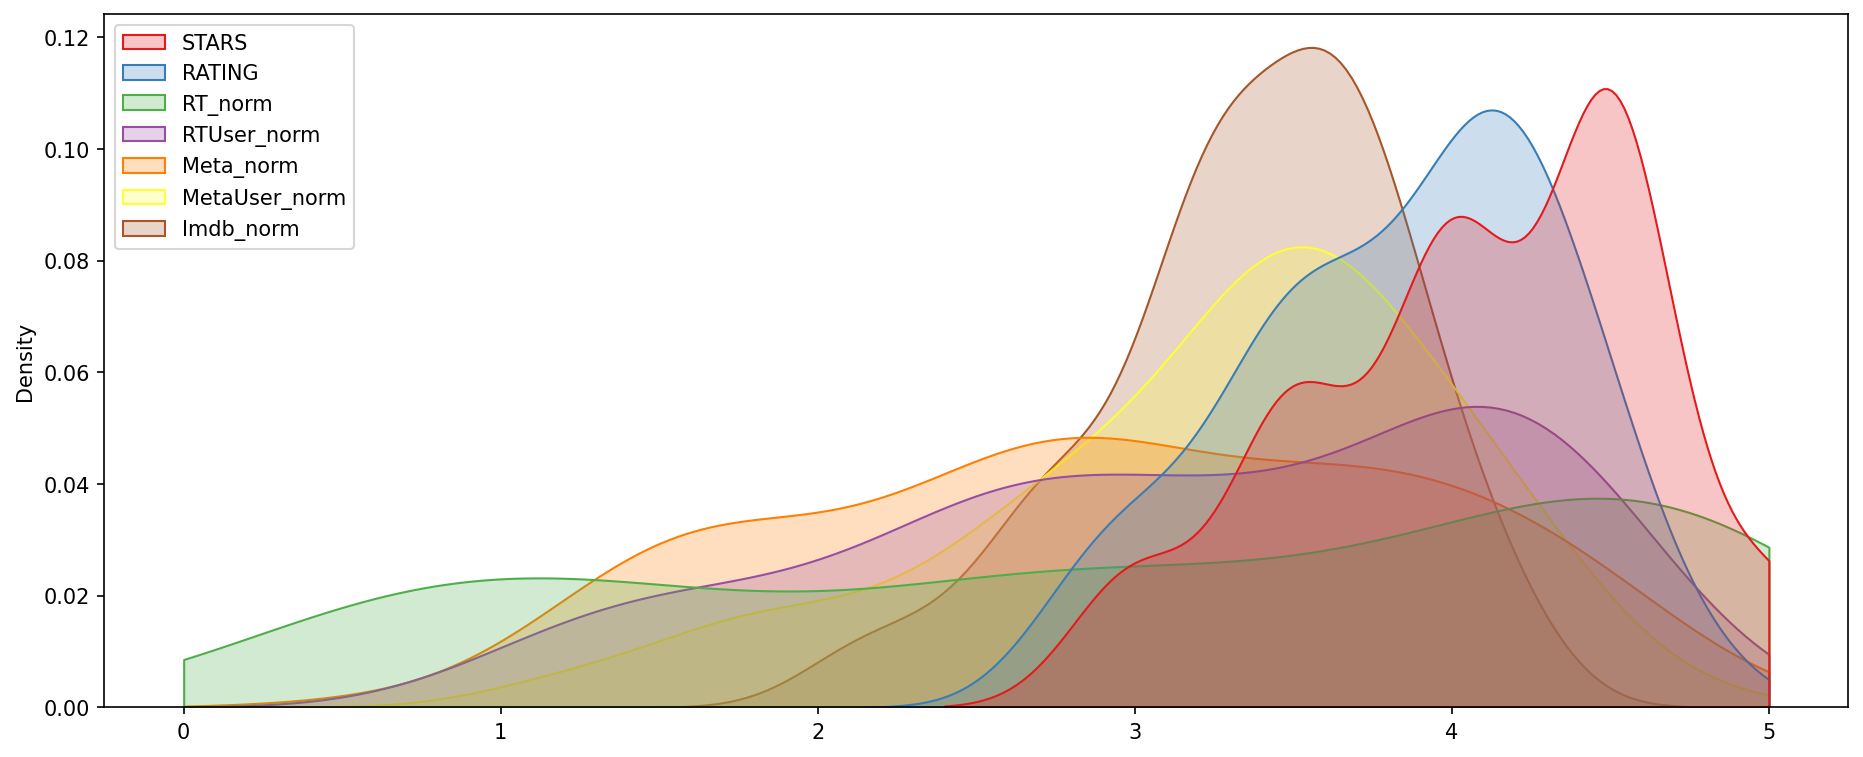

In [51]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=df,clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

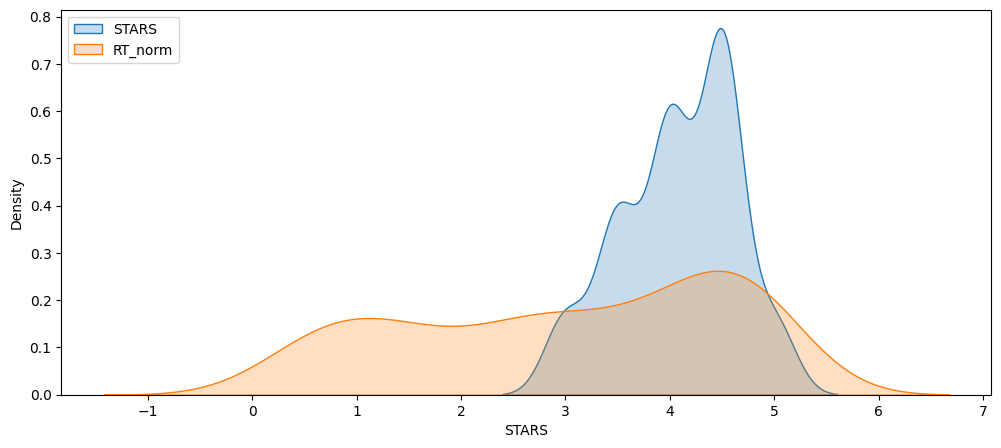

In [52]:
#CODE HERE
plt.figure(figsize=(12,5))
sns.kdeplot(data=df, x="STARS", label="STARS", fill=True)
sns.kdeplot(data=df, x="RT_norm", label="RT_norm", fill=True)
plt.legend(loc='upper left')

<Axes: ylabel='Count'>

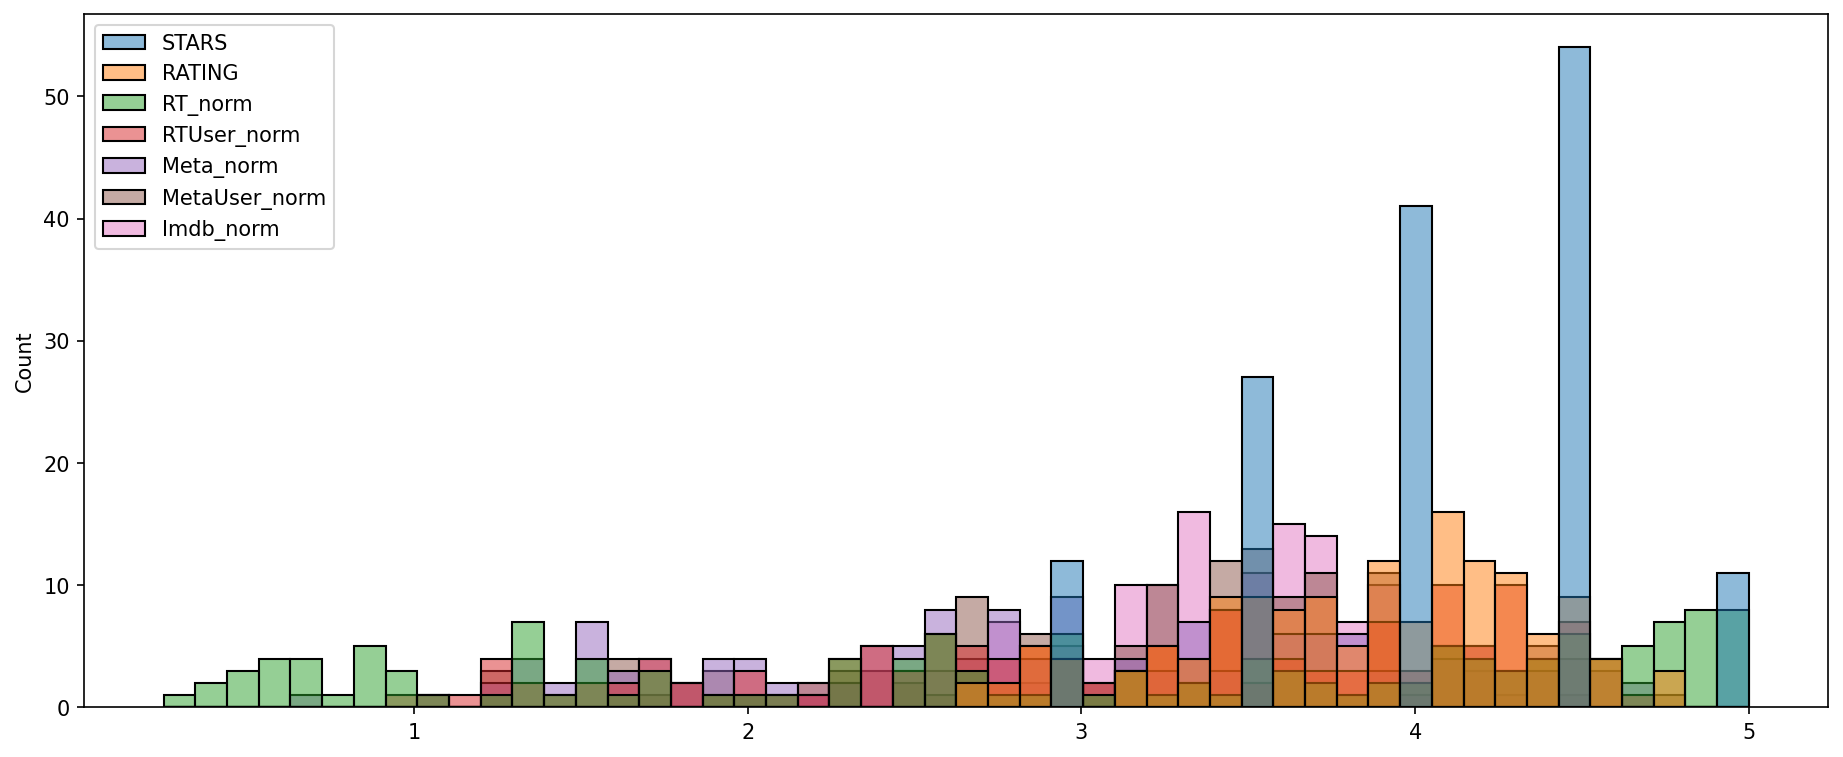

In [53]:
# Histogram plot comparig all normalized scores
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(df,bins=50)

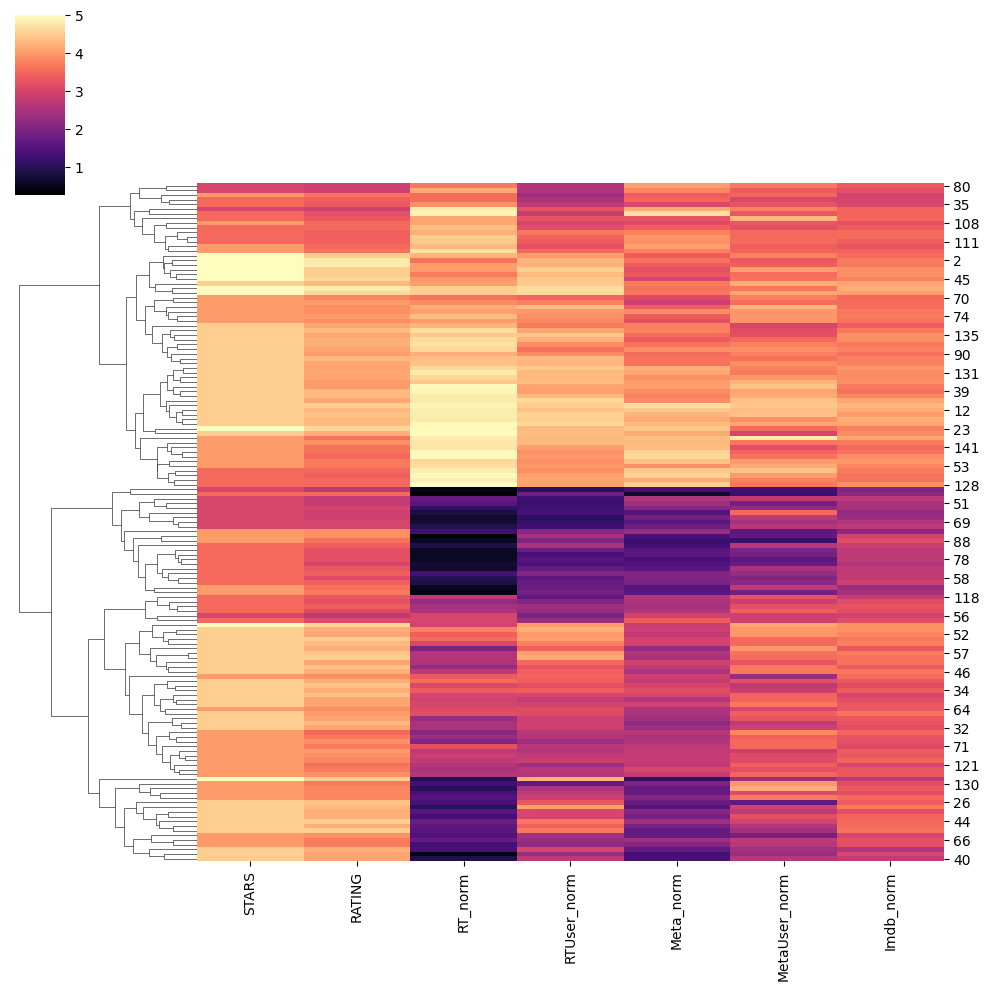

In [56]:
# Clustermap visialzation of all normalized scores
sns.clustermap(df[["STARS","RATING","RT_norm","RTUser_norm","Meta_norm","MetaUser_norm","Imdb_norm"]],cmap='magma',col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies based off the Rotten Tomatoes Critic Ratings.**

In [57]:
df.nsmallest(10,'RT_norm')

,FILM,STARS,RATING,RT_norm,RTUser_norm,Meta_norm,MetaUser_norm,Imdb_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
88,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75


**Visualization the distribution of ratings across all sites for the top 10 worst movies.**

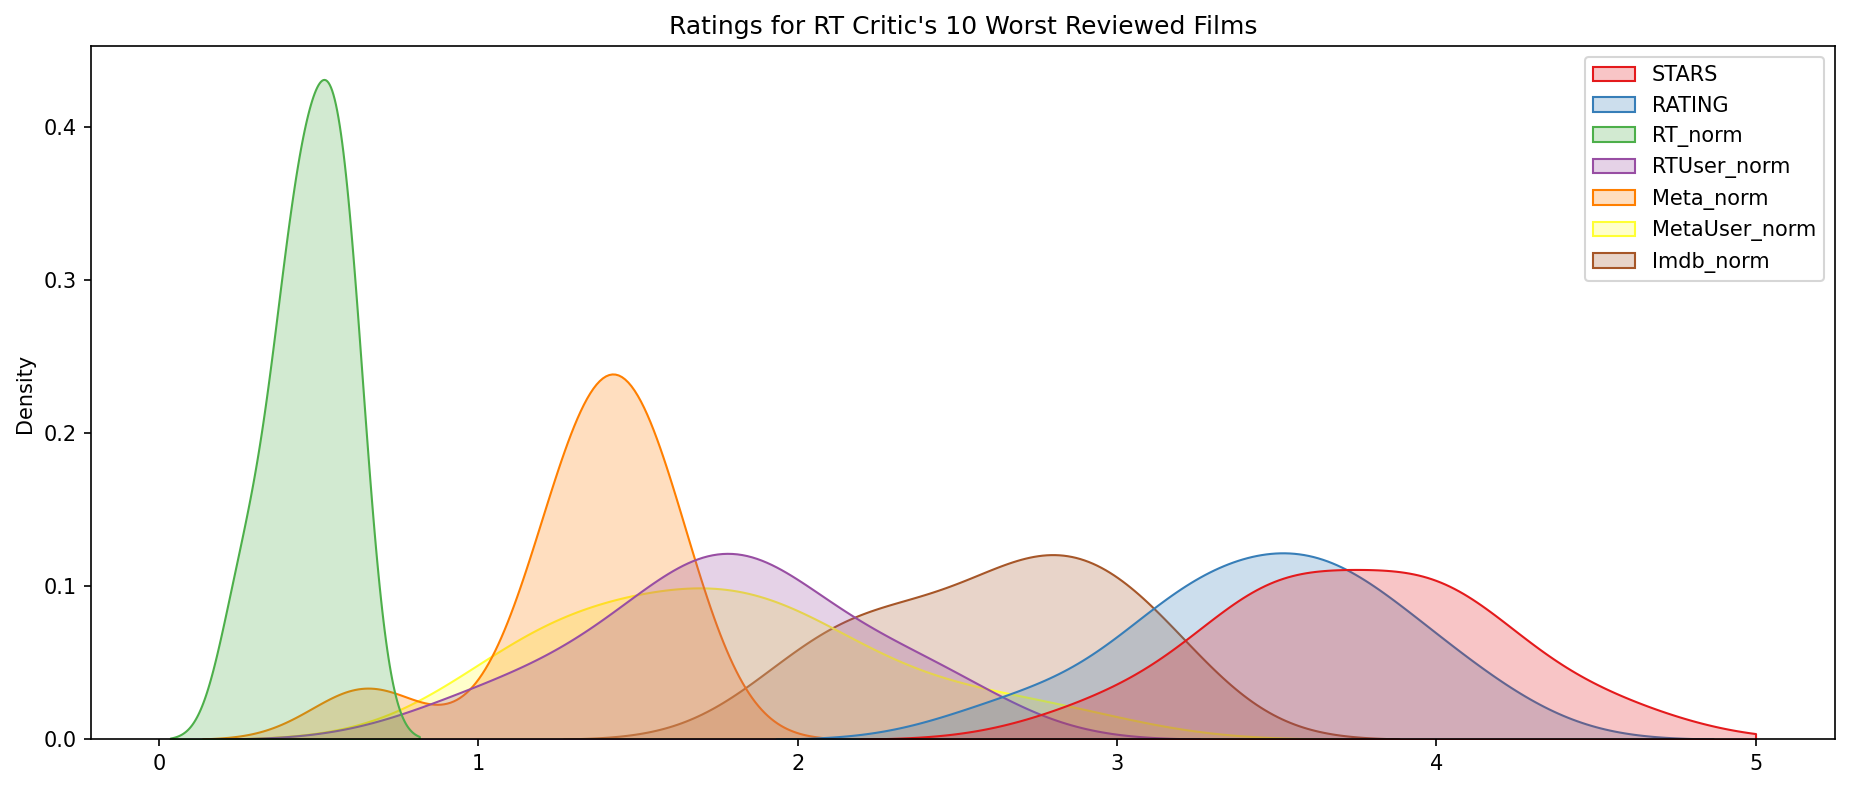

In [59]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = df.nsmallest(10,'RT_norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [61]:
# Taken 3 rating across platforms
df.iloc[25]

FILM             Taken 3 (2015)
STARS                       4.5
RATING                      4.1
RT_norm                    0.45
RTUser_norm                 2.3
Meta_norm                   1.3
MetaUser_norm               2.3
Imdb_norm                  3.05
Name: 25, dtype: object

In [73]:
# Comparison between fandango scores and average scores from all sites
taken3_stars = df.iloc[25]["STARS"]
take3_all_sites_avg = df.iloc[25][["RT_norm", "RTUser_norm", "Meta_norm", "MetaUser_norm", "Imdb_norm"]].mean().round(1)
f"Fandango score: {taken3_stars}, all sites average score: {take3_all_sites_avg}"

'Fandango score: 4.5, all sites average score: 1.9'